In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from pprint import pprint

from functools import partial

import numpy as np
from sklearn.preprocessing import scale
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import matplotlib.animation as ani

import mlgrad.models as models
import mlgrad.regr as regr
import mlgrad.cls as cls
import mlgrad.pca as pca
import mlgrad.plots as plots
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss
import mlgrad.gd as gd
import mlgrad.smooth as smooth
import mlgrad.inventory as inventory
from mlgrad.af import averaging_function
import mlgrad.avragg as avragg

import rampy
import pybaselines
import random

from irsa import io
from irsa.preprocess import despike, utils
import irsa.widgets as widgets
import irsa.spectra as spectra
import irsa.io as io

import scipy.special as special

import copy

import ipywidgets
from IPython.display import display

import sys
print(sys.version)

%matplotlib widget

3.13.3 (main, Apr 10 2025, 21:38:51) [GCC 14.2.0]


In [2]:
dd_36 = spectra.SpectraCollection()
dd_36.load("/home/intellimath/work/spectra/spectra_8_15_36", "rm_bl")

In [3]:
dd_95 = spectra.SpectraCollection()
dd_95.load("/home/intellimath/work/spectra/spectra_8_15_95", "rm_bl")

In [4]:
dd95 = dd_95.union(dd_95.keys())
dd36 = dd_36.union(dd_36.keys())

In [5]:
# dd_36.select_baselines(
#         tau2=1000.0, func2_mode="e",
#         tau2_smooth=1.0, 
#         func=funcs.Step(0.1),
#         func2=inventory.relative_abs_max,
#         override_tau2=True
#         )

In [6]:
dd36.plot_spectra()
dd95.plot_spectra()

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='50%'), max=61), FloatRangeSlide…

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='50%'), max=57), FloatRangeSlide…

In [13]:
dd36.plot_pca_spectra_2d(kind="WM", alpha=0.975, verbose=False)

interactive(children=(FloatSlider(value=0.975, description='alpha', layout=Layout(width='50%'), max=1.0, step=…

interactive(children=(FloatSlider(value=0.975, description='alpha', layout=Layout(width='50%'), max=1.0, step=…

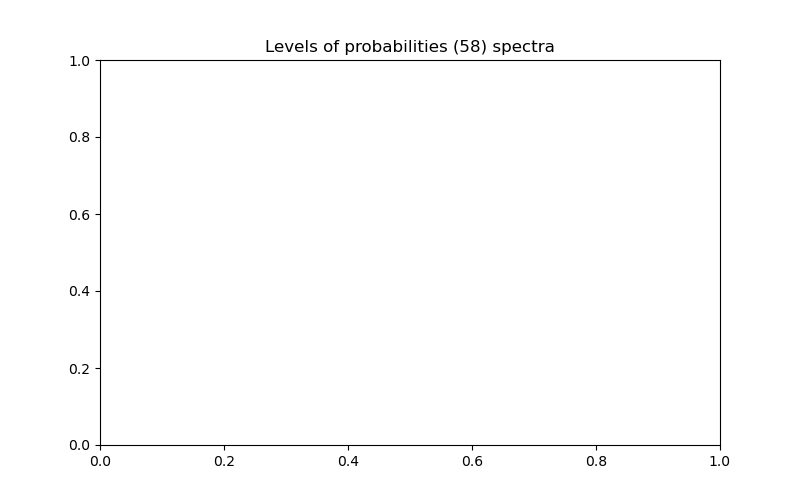

In [14]:
dd95.plot_pca_spectra_2d(kind="WM", alpha=0.975, verbose=False)

In [17]:
c_95, As_95, Ls_95 = pca.find_loc_and_pc(dd95.y, 5)
print(As_95)

[[ 0.014  0.013  0.012 ...  0.001  0.001  0.000]
 [ 0.070  0.066  0.053 ... -0.004 -0.001  0.001]
 [ 0.126  0.113  0.079 ... -0.007 -0.005  0.004]
 [ 0.039  0.012  0.005 ... -0.002 -0.004  0.001]
 [-0.111 -0.077 -0.054 ... -0.003 -0.000  0.000]]


In [18]:
c_36, As_36, Ls_36 = pca.find_loc_and_pc(dd36.y, 5)
print(As_36)

[[ 0.010  0.011  0.003 ...  0.003  0.002 -0.000]
 [ 0.072  0.058  0.043 ... -0.003  0.005 -0.001]
 [ 0.038  0.028  0.025 ...  0.002  0.001  0.001]
 [-0.024 -0.026 -0.023 ... -0.001 -0.001  0.001]
 [-0.055 -0.058 -0.045 ...  0.005  0.007 -0.001]]


In [19]:
Us_95 = (dd95.y - c_95) @ As_95.T
Us_36 = (dd36.y - c_36) @ As_36.T

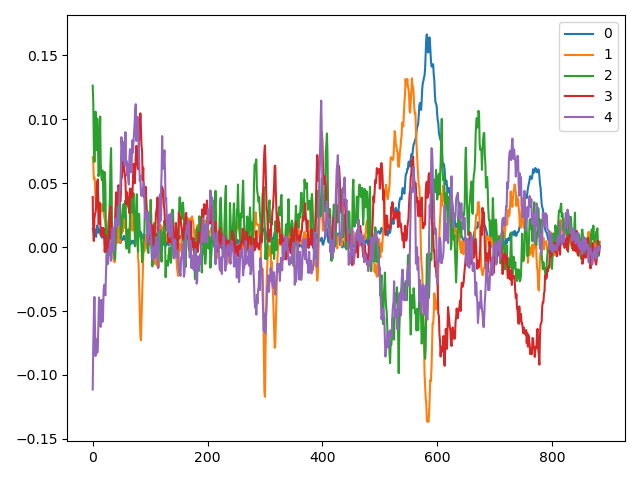

In [20]:
plt.figure()
for i,a in enumerate(As_95):
    plt.plot(a, label=str(i))
plt.tight_layout()
plt.legend()
plt.show()

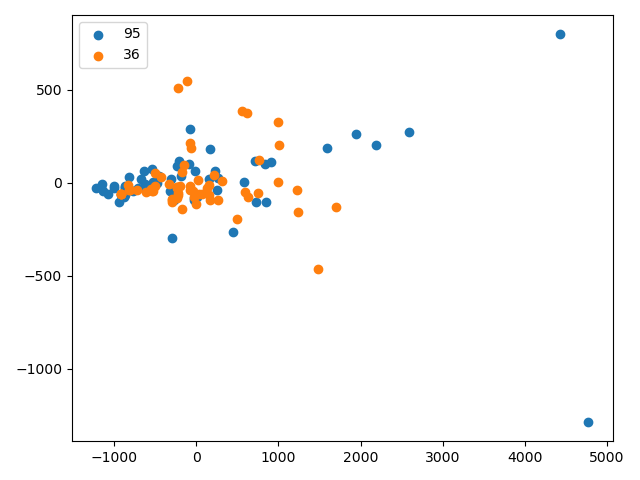

In [21]:
plt.figure()
plt.scatter(Us_95[:,0], Us_95[:,1], label="95")
plt.scatter(Us_36[:,0], Us_36[:,1], label="36")
plt.tight_layout()
plt.legend()
plt.show()

[0.947 0.034 0.008 0.006 0.005]


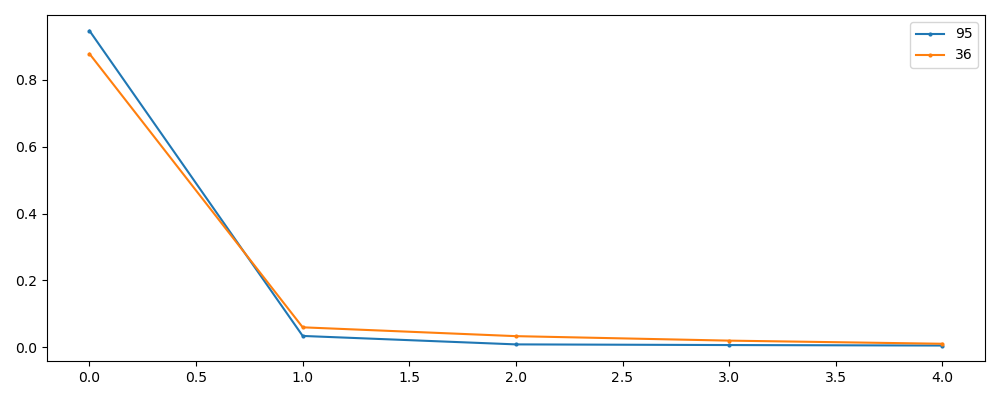

In [16]:
print(Ls_95/Ls_95.sum())
plt.figure(figsize=(10,4))
plt.plot(Ls_95/Ls_95.sum(), marker='o', markersize=2, label="95")
plt.plot(Ls_36/Ls_36.sum(), marker='o', markersize=2, label="36")
plt.tight_layout()
plt.legend()
plt.show()